UiBench per-CPU CGroup residency analysis
=======================
This is a run of experiments/run_uibench.py with the cgroups module enabled.
This notebook parses and plots the trace.html

In [1]:
#!/usr/bin/env python
%pylab inline
import trappy
from trace import Trace
import logging
import pandas as pd
import numpy as np
import os

from conf import LisaLogging
LisaLogging.setup(level=logging.ERROR)
logging.info('#### Setup FTrace')
path_to_html = "/home/joelaf/repo/lisa-aosp/external/lisa/results/UiBench_cgroups/trace.html"

Populating the interactive namespace from numpy and matplotlib


In [2]:
tr = Trace(None, path_to_html,
           cgroup_info = { 
               'cgroups': ['foreground', 'background', 'system-background', 'top-app', 'rt'],
               'controller_ids': { 4: 'cpuset', 2: 'schedtune' }
           },
           events=[ 'sched_switch', 'cgroup_attach_task_devlib', 'cgroup_attach_task', 'sched_process_fork' ],
           normalize_time=False)

Total amount of time spent per Cgroup (schedtune)
===========================
(NaN is the idle task)

In [3]:
tr.data_frame.cpu_residencies_cgroup('schedtune')

,cpu_0,cpu_1,cpu_2,cpu_3,cpu_4,cpu_5,cpu_6,cpu_7,total
schedtune,,,,,,,,,
background,0.347545,0.282818,0.008195,0.005146,0.000000,0.000000,0.327283,0.581963,1.552950
foreground,6.719877,5.206815,3.247095,0.704877,0.039799,1.112821,0.063567,0.071050,17.165901
root,4.603062,1.215996,0.556835,0.372591,0.215485,0.241113,0.212387,0.130615,7.548084
top-app,0.015356,0.014626,0.024936,0.001403,1.981606,5.213750,0.082708,0.008507,7.342892
NaN,21.074286,26.070308,28.916162,31.629013,30.516829,26.186595,32.063491,32.237536,228.694220


Plot per-CPU breakdown without considering idle time
------------------------------------------------------------

/home/joelaf/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


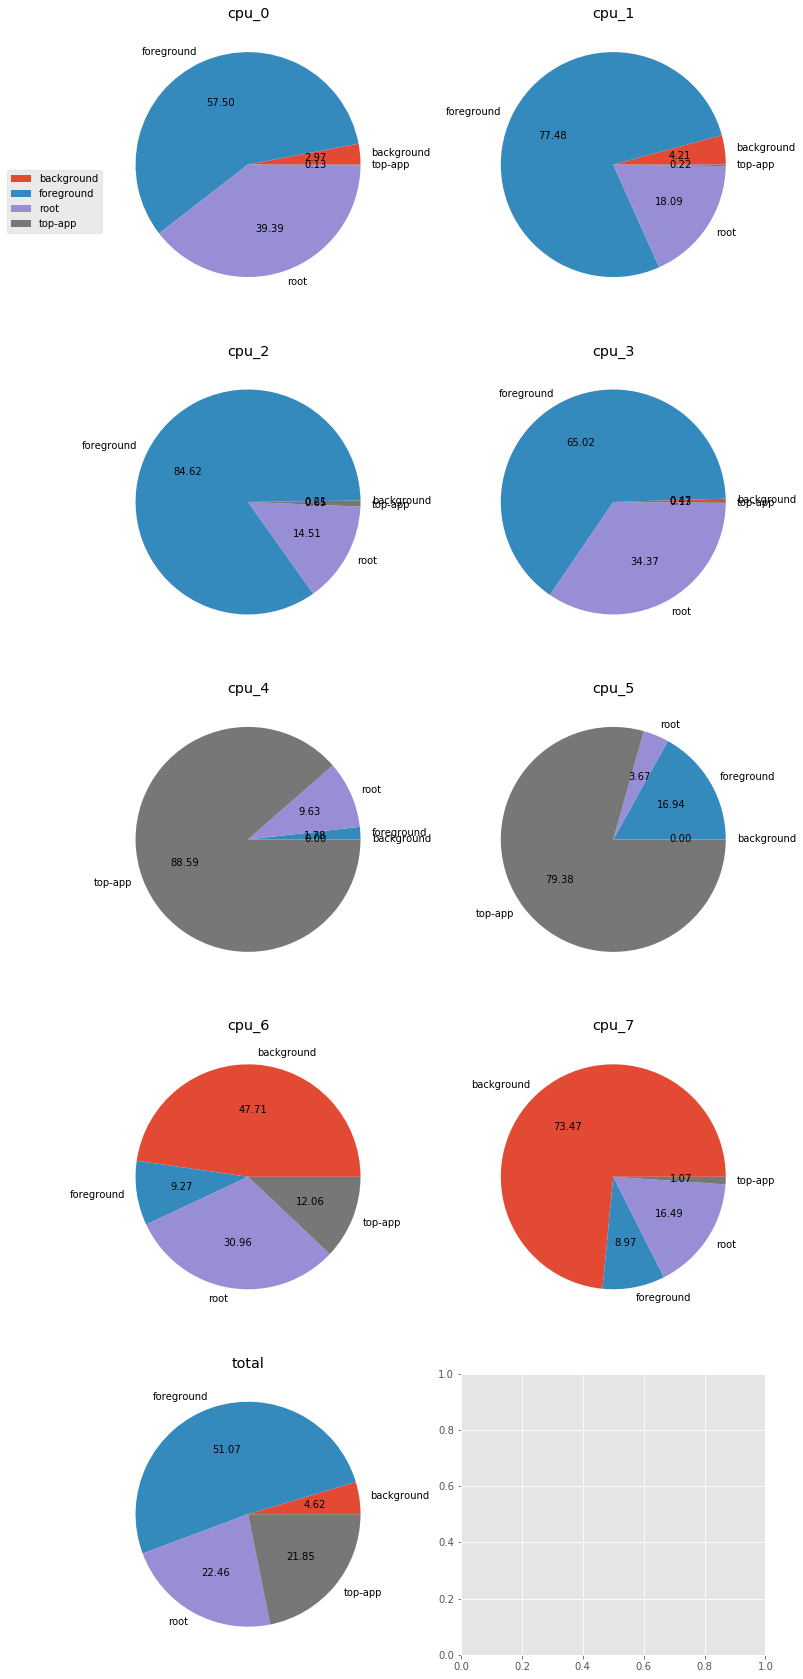

In [4]:
tr.analysis.residency.plot_cgroup('schedtune', idle=False)

Plot per-CPU breakdown WITH considering idle time (yellow slice)
------------------------------------------------------------

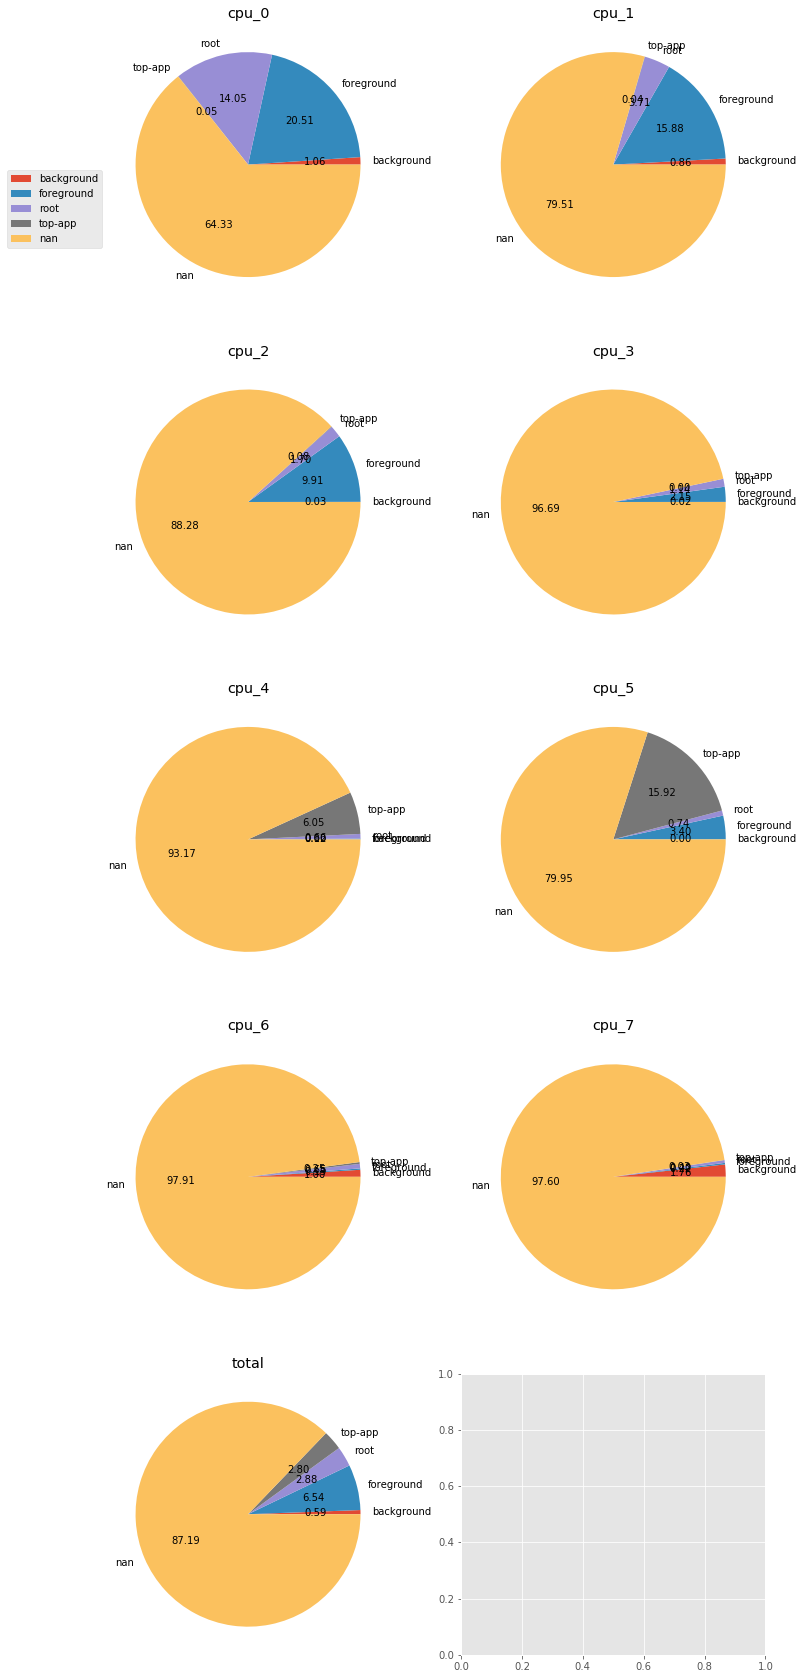

In [5]:
tr.analysis.residency.plot_cgroup('schedtune', idle=True)